In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
data = pd.read_csv("D:\\Git\\cancer_classification\\data\\data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### EDA

In [4]:
len(data)

569

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
cols = data.columns[1:-1]
cols

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data = data[cols]
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
data.nunique(axis = 0)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [9]:
data['diagnosis'] = data['diagnosis'].replace({'M':'1','B':'0'}).astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [11]:
Y = data['diagnosis']
X = data[data.columns[1:]]

In [12]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [13]:
Y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
len(data)

569

#### Class Ratio

([<matplotlib.patches.Wedge at 0x196a95d5e48>,
 [Text(-1.013042520432627, -0.42865469995733285, '0'),
  Text(1.013042560566172, 0.4286546051094449, '1')],
 [Text(-0.5525686475087055, -0.2338116545221815, '62.7%'),
  Text(0.55256866939973, 0.23381160278696994, '37.3%')])

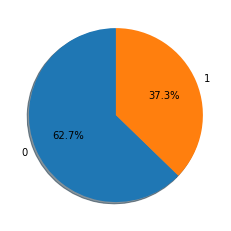

In [16]:
plt.pie(Y.value_counts(),labels = set(Y), autopct='%1.1f%%',shadow=True, startangle=90)

### Exploring Features

In [17]:
def eda_unifigures(col):
    print('\n',col)
    fig, axs = plt.subplots(3)
    axs[0].hist(X[col])
    axs[1].boxplot(X[col],vert = False)
    axs[2].violinplot(X[col],vert = False)
    #scipy.stats.probplot(X[col])
    plt.show()


 radius_mean


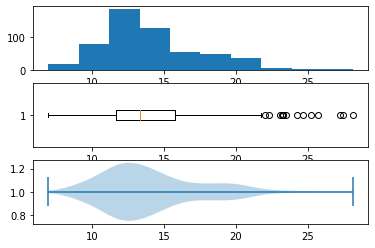


 texture_mean


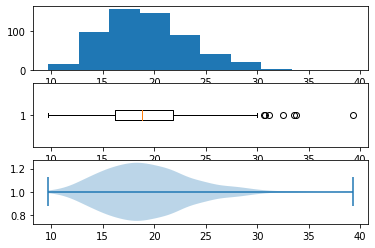


 perimeter_mean


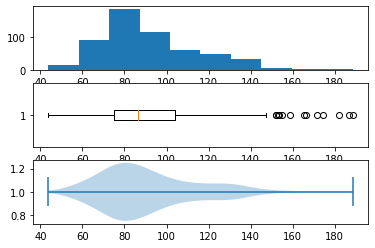


 area_mean


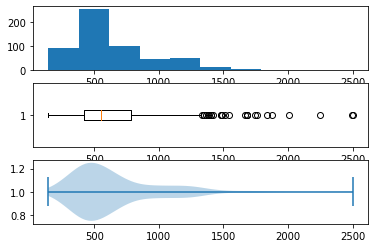


 smoothness_mean


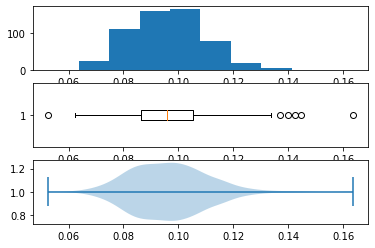


 compactness_mean


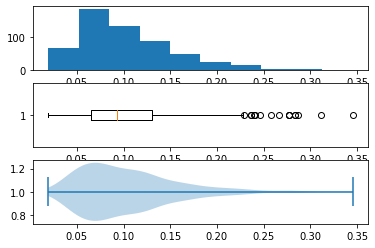


 concavity_mean


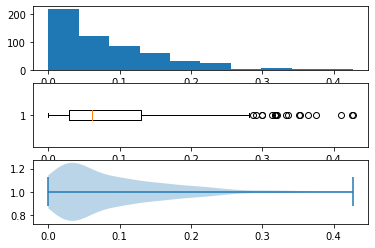


 concave points_mean


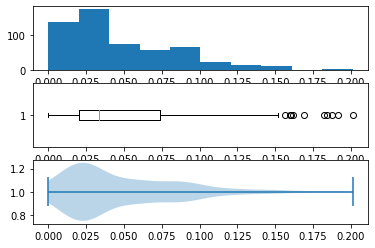


 symmetry_mean


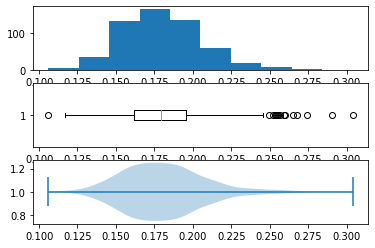


 fractal_dimension_mean


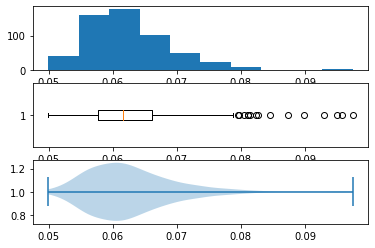


 radius_se


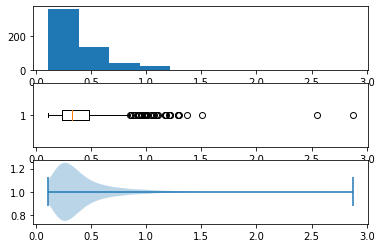


 texture_se


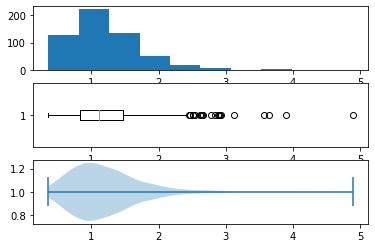


 perimeter_se


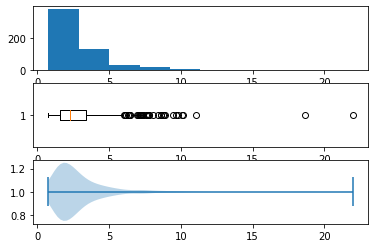


 area_se


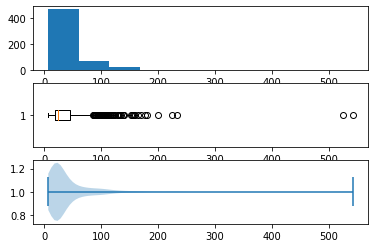


 smoothness_se


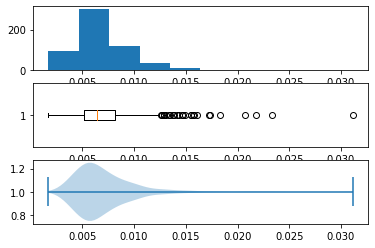


 compactness_se


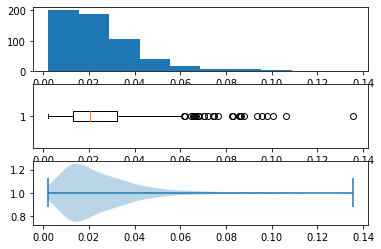


 concavity_se


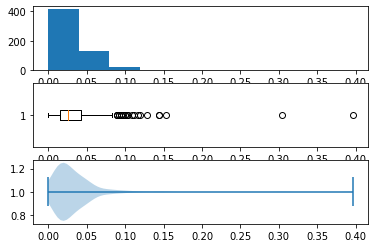


 concave points_se


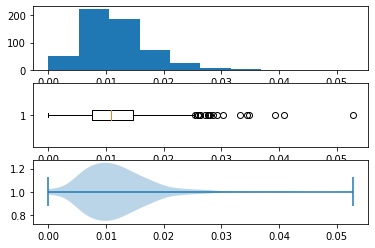


 symmetry_se


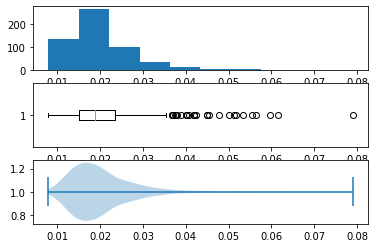


 fractal_dimension_se


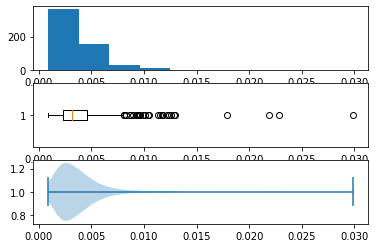


 radius_worst


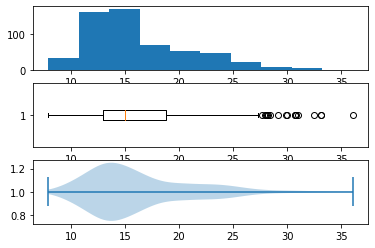


 texture_worst


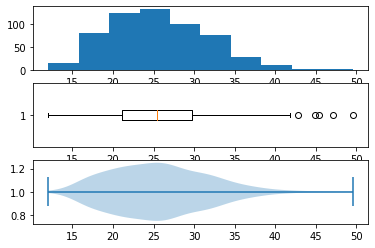


 perimeter_worst


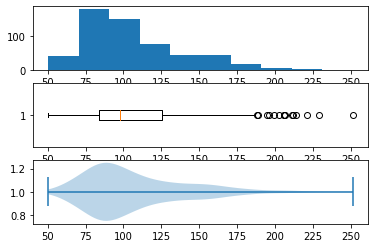


 area_worst


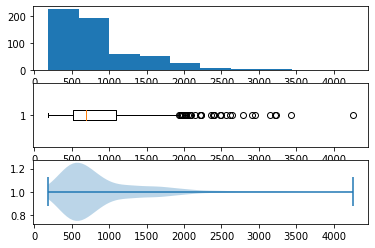


 smoothness_worst


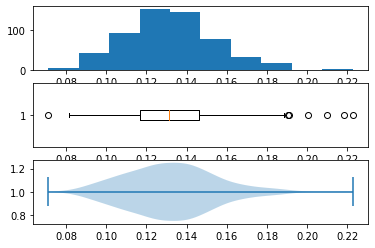


 compactness_worst


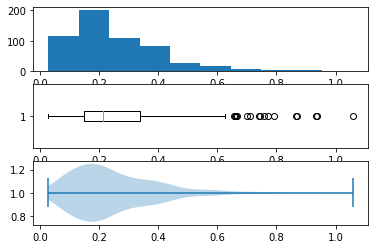


 concavity_worst


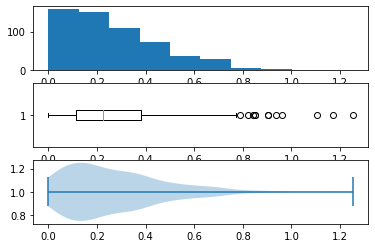


 concave points_worst


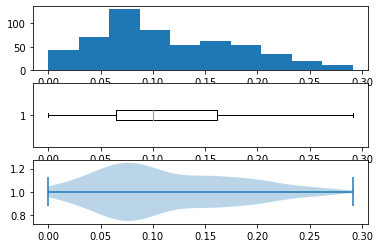


 symmetry_worst


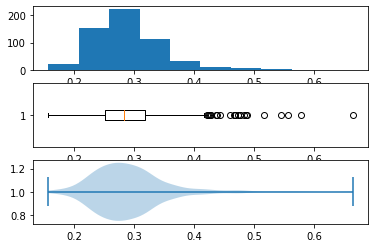


 fractal_dimension_worst


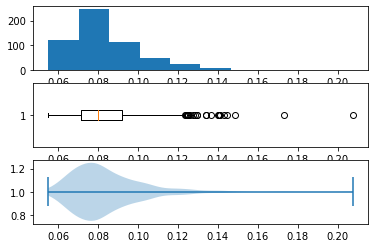

In [18]:
for col in X.columns:
    eda_unifigures(col)

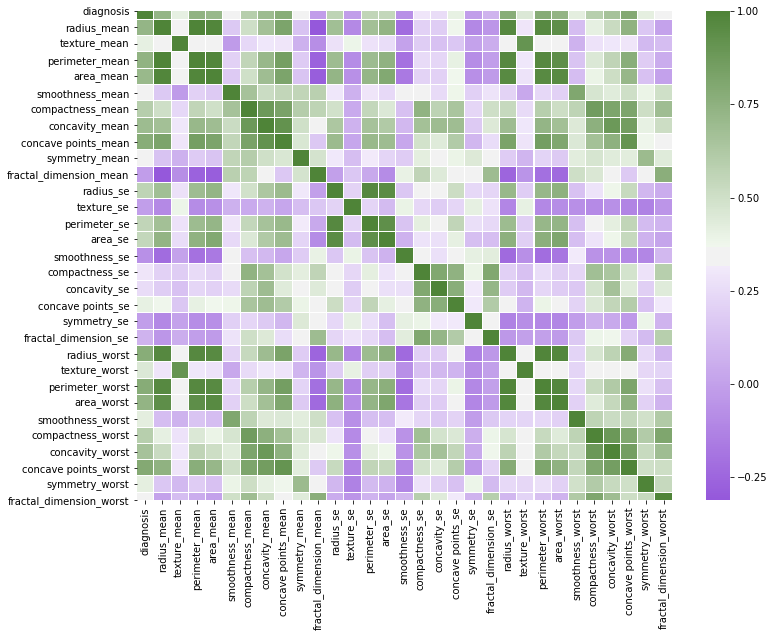

In [19]:
plt.figure(figsize=(12, 9))
corr = data.corr()
cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr, fmt='.1%',  linewidths=.05, cmap=cmap);

##### Multivariate Analysis

C:\Users\mayan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mayan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


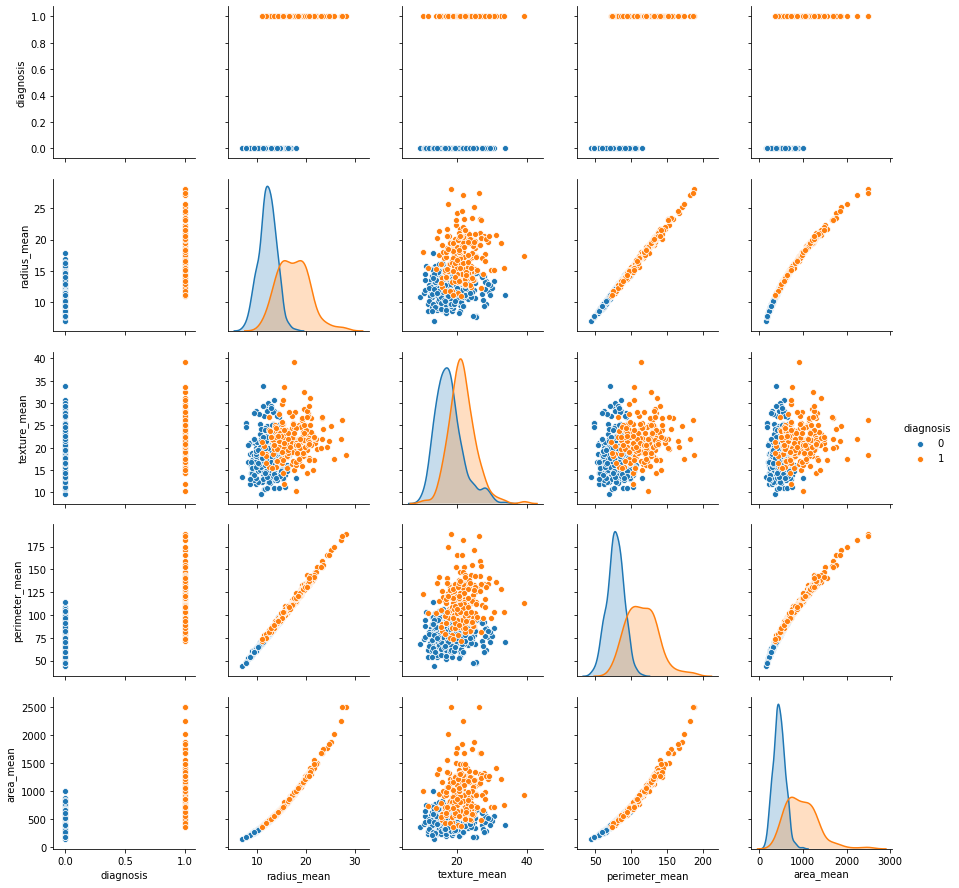

In [20]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

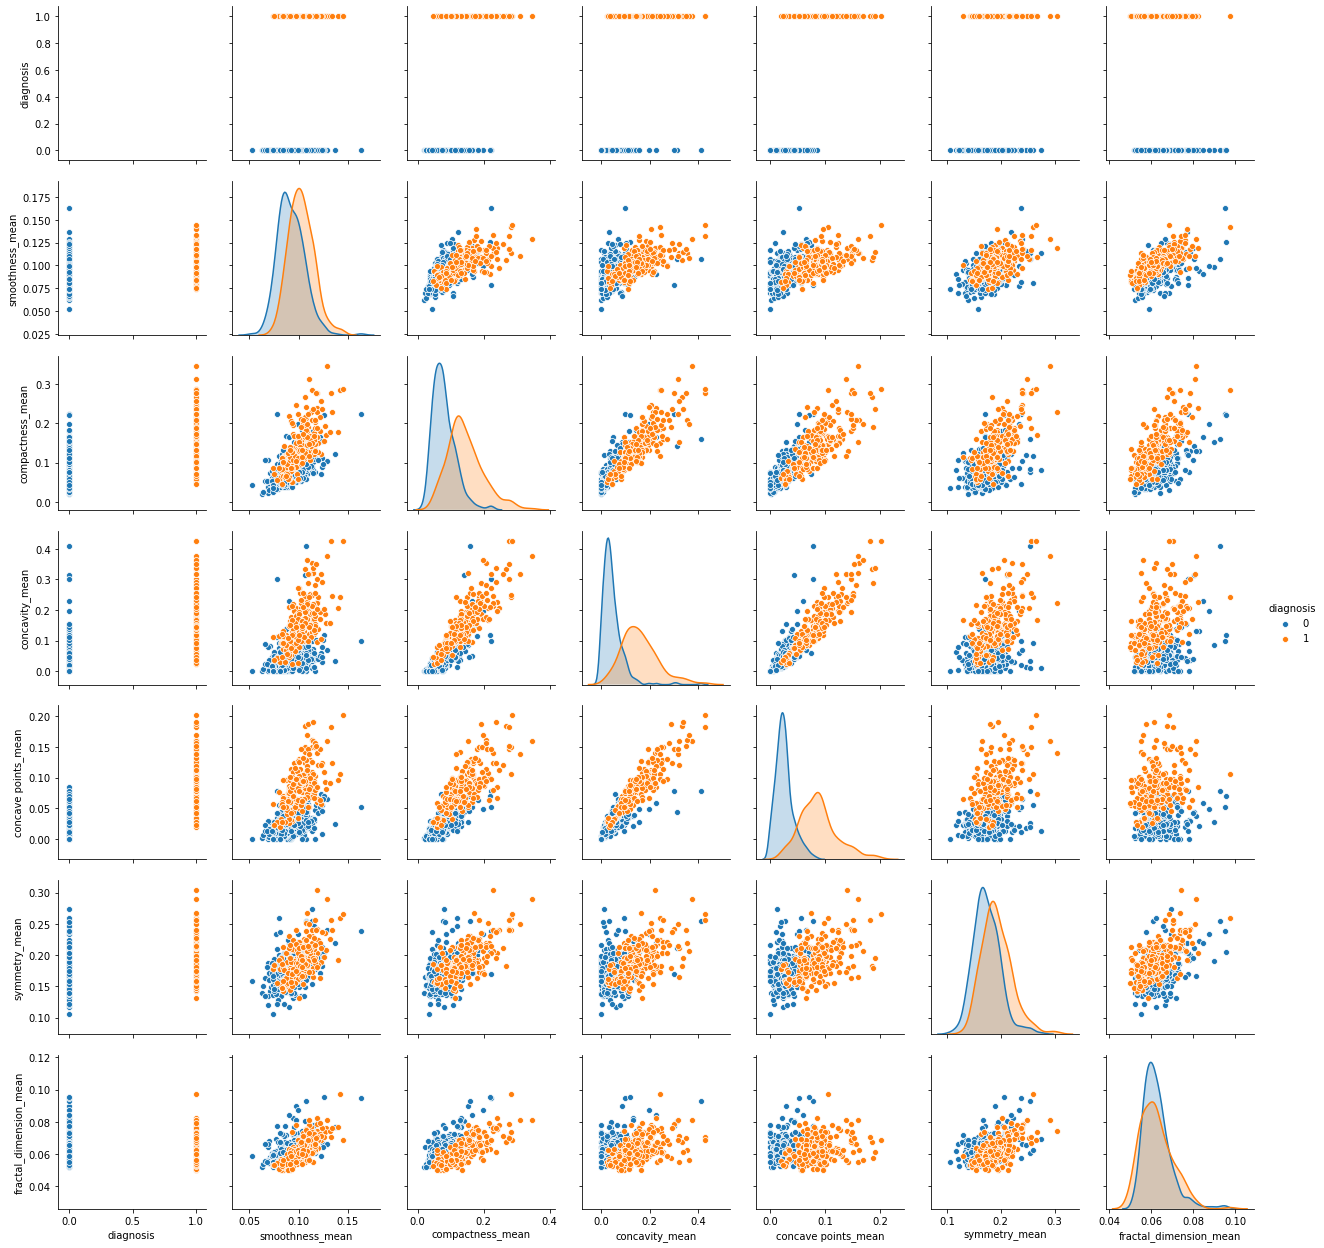

In [21]:
cols = ["diagnosis", 'smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

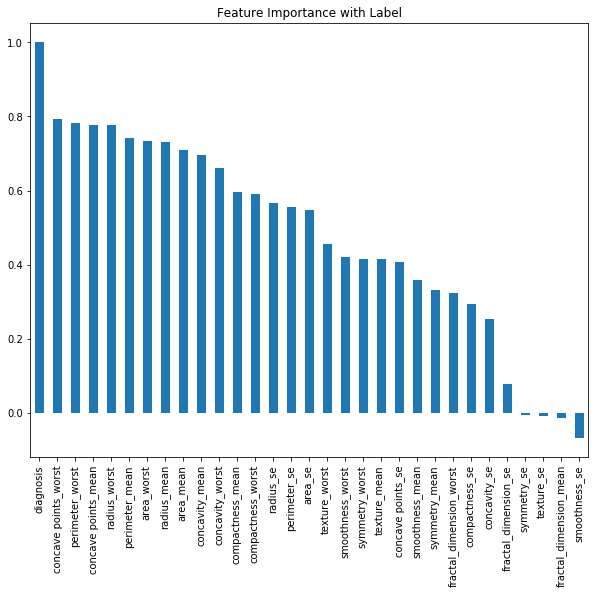

In [22]:
plt.figure(figsize = (10,8))
plt.title("Feature Importance with Label")
corr['diagnosis'].sort_values(ascending = False).plot(kind='bar')

##### Dimensionality Reduction

###### PCA

In [23]:
from sklearn.decomposition import PCA

###### Choosing number of components

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns = cols)

In [26]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [27]:
pca = PCA(2)

In [28]:
X_pca = pd.DataFrame(pca.fit_transform(X))

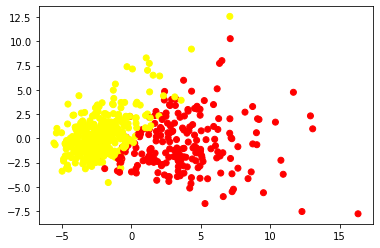

In [29]:
color = ['red' if l == 1 else 'yellow' for l in Y]
plt.scatter(X_pca[0],X_pca[1],c = color)

In [30]:
pca2 = PCA(random_state = 4).fit(X)

Text(0, 0.5, 'Explained variance')

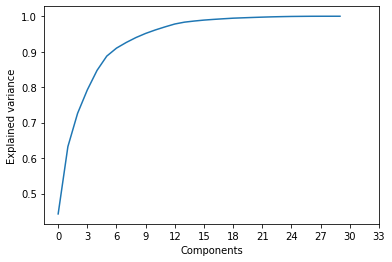

In [31]:
variances = np.cumsum(pca2.explained_variance_ratio_)
plt.plot(variances)
plt.xticks(range(0,34,3))
plt.xlabel('Components')
plt.ylabel("Explained variance")


In [32]:
variances[6]

0.910095300696731

In [33]:
X_reduced = PCA(7,random_state = 4).fit_transform(X)

In [34]:
X_reduced = pd.DataFrame(X_reduced)

In [35]:
X_reduced.head()

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159375
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028654,0.013353
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541453,-0.668161
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053426,1.429920
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226492,-0.936210


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,shuffle = True,random_state = 4)

In [38]:
print(X_test.shape)
print(Y_test.shape)

(171, 30)
(171,)


In [39]:
X_r_train,X_r_test,Y_train,Y_test = train_test_split(X_reduced,Y,test_size = 0.3,shuffle = True,random_state = 4)

In [40]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,3.971288,-0.190738,3.976130,5.244841,1.269571,0.895628,2.903973,2.852321,-0.597362,-1.069952,...,2.452025,-1.173652,2.419765,2.845036,-0.796437,-0.653093,0.229857,0.683579,-2.026684,-1.590202
129,1.608290,1.356762,1.582979,1.527599,0.365770,1.033974,2.080367,1.701909,1.425260,-0.236401,...,1.317213,1.286918,1.234289,1.245335,-0.213419,0.838655,1.415804,0.892184,0.653979,0.039023
13,0.489274,1.084495,0.483201,0.363507,-0.878913,-0.078478,0.132840,0.121770,0.129175,-1.335044,...,0.118205,0.322883,0.141149,-0.007178,-0.844656,-0.393548,-0.191846,-0.041207,-0.148441,-1.167934
307,-1.456224,-1.137854,-1.466743,-1.162069,-1.872383,-1.386888,-1.068658,-1.172263,-0.086230,0.784274,...,-1.360572,-0.913101,-1.380908,-1.046104,-1.479838,-1.284653,-1.235211,-1.533565,0.145995,-0.327276
338,-1.158009,-0.409482,-1.135162,-0.978625,0.308838,-0.589031,-0.799618,-0.803976,0.286166,0.072637,...,-1.058024,0.189351,-1.050880,-0.872950,0.343297,-0.725613,-0.799692,-0.755486,-0.010929,-0.404858


In [41]:
Y_train.head()

212    1
129    1
13     1
307    0
338    0
Name: diagnosis, dtype: int32

#### Modeling

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
import pickle as pkl
from sklearn.metrics import precision_score,recall_score

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [43]:
def train_cv(X,y,model):
    kf = KFold(n_splits=5, random_state=4, shuffle=True)
    error = []
    for train_index, val_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", val_index)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(X_train, y_train)
        error.append(model.score(X_val,y_val))
        print("Cross-Validation Score : %s" % "{0:.3%}".format(model.score(X_val,y_val)))
    print("Mean Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    return

def get_results(y_test,y_hat,y_prob):
    conf_matrix = confusion_matrix(y_test,y_hat)
    print("\n\nTest set Results:\n")
    print ("\n Confusion Matrix : \n",conf_matrix)
    print ("Test Accuracy   Score : ",accuracy_score(y_test,y_hat))
    print ("Precision : ",precision_score(y_test,y_hat))
    print("Recall :",recall_score(y_test,y_hat))
    print("F1 Score:",f1_score(y_test,y_hat))
    model_roc_auc = roc_auc_score(y_test,y_hat) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
    #print('Threshold: ',thresholds)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [44]:
lrc = LogisticRegression(random_state = 4)
params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


grid_lr = GridSearchCV(estimator = lrc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_lr.fit(X_train, Y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    2.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=4), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [45]:
print(grid_lr.best_estimator_)

LogisticRegression(random_state=4, solver='saga')


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Cross-Validation Score : 98.750%
Cross-Validation Score : 97.500%
Cross-Validation Score : 97.500%
Cross-Validation Score : 97.468%
Cross-Validation Score : 97.468%
Mean Cross-Validation Score : 97.737%


Test set Results:


 Confusion Matrix : 
 [[114   3]
 [  0  54]]
Test Accuracy   Score :  0.9824561403508771
Precision :  0.9473684210526315
Recall : 1.0
F1 Score: 0.972972972972973
Area under curve :  0.9871794871794871 



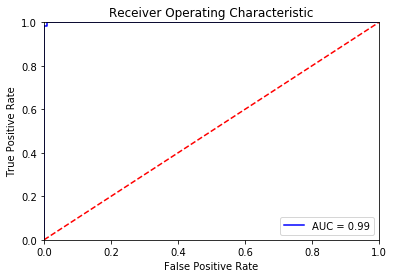

In [46]:
best_lr = grid_lr.best_estimator_
train_cv(X_train,Y_train,best_lr)
pkl.dump(best_lr, open('D:\\Git\\cancer_classification\\Data\\LogisticRegressionModel', 'wb'))
Y_hat_lr = best_lr.predict(X_test)
Y_prob_lr = best_lr.predict_proba(X_test)
get_results(Y_test,Y_hat_lr,Y_prob_lr)

In [47]:
from sklearn.tree import DecisionTreeClassifier


In [48]:
dtc = DecisionTreeClassifier(random_state = 4)

params = {
    'criterion' : ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_dtc = GridSearchCV(estimator = dtc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)

grid_dtc.fit(X_train, Y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [49]:
print(grid_dtc.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_features='log2', random_state=4)


Cross-Validation Score : 92.500%
Cross-Validation Score : 90.000%
Cross-Validation Score : 87.500%
Cross-Validation Score : 94.937%
Cross-Validation Score : 93.671%
Mean Cross-Validation Score : 91.722%


Test set Results:


 Confusion Matrix : 
 [[108   9]
 [  3  51]]
Test Accuracy   Score :  0.9298245614035088
Precision :  0.85
Recall : 0.9444444444444444
F1 Score: 0.8947368421052632
Area under curve :  0.9337606837606838 



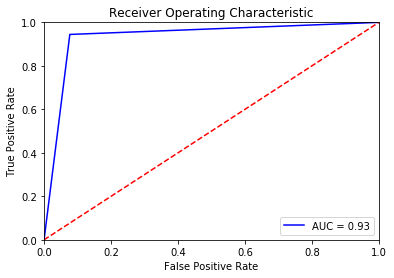

In [50]:
best_dt = grid_dtc.best_estimator_
train_cv(X_train,Y_train,best_dt)
pkl.dump(best_dt, open('D:\\Git\\cancer_classification\\Data\\DecisionTreeModel', 'wb'))
y_hat_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)
get_results(Y_test,y_hat_dt,y_prob_dt)

#### Support Vector Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC(probability = True)

params = {
    'class_weight': [None, 'balanced']
}

grid_svc = GridSearchCV(estimator = svc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)

grid_svc.fit(X_train,Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced']},
             scoring='accuracy', verbose=3)

Cross-Validation Score : 96.250%
Cross-Validation Score : 97.500%
Cross-Validation Score : 98.750%
Cross-Validation Score : 93.671%
Cross-Validation Score : 96.203%
Mean Cross-Validation Score : 96.475%


Test set Results:


 Confusion Matrix : 
 [[114   3]
 [  0  54]]
Test Accuracy   Score :  0.9824561403508771
Precision :  0.9473684210526315
Recall : 1.0
F1 Score: 0.972972972972973
Area under curve :  0.9871794871794871 



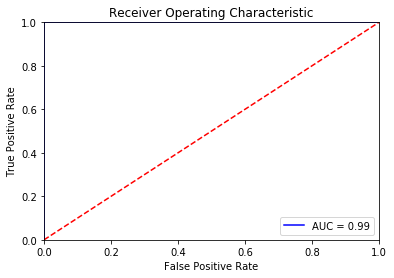

In [53]:
best_svc = grid_svc.best_estimator_
train_cv(X_train,Y_train,best_svc)
pkl.dump(best_svc, open('D:\\Git\\cancer_classification\\Data\\SVModel', 'wb'))
y_hat_svc  = best_svc.predict(X_test)
y_prob_svc = best_svc.predict_proba(X_test)
get_results(Y_test,y_hat_svc,y_prob_svc)

#### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(random_state = 4)

params = {
        'n_estimators': [100,250,500],
        'criterion' : ['gini', 'entropy'],
        'max_features' : ['auto', 'log2' , 'sqrt'],
        'oob_score' :[True]
}

grid_rfc = grid_svc = GridSearchCV(estimator = rfc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_rfc.fit(X_train,Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   13.4s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 250, 500], 'oob_score': [True]},
             scoring='accuracy', verbose=3)

In [56]:
best_rfc = grid_rfc.best_estimator_
print(best_rfc)
train_cv(X_train,Y_train,best_rfc)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=4)
Cross-Validation Score : 97.500%
Cross-Validation Score : 96.250%
Cross-Validation Score : 91.250%
Cross-Validation Score : 96.203%
Cross-Validation Score : 96.203%
Mean Cross-Validation Score : 95.481%




Test set Results:


 Confusion Matrix : 
 [[109   8]
 [  2  52]]
Test Accuracy   Score :  0.9415204678362573
Precision :  0.8666666666666667
Recall : 0.9629629629629629
F1 Score: 0.912280701754386
Area under curve :  0.9472934472934472 



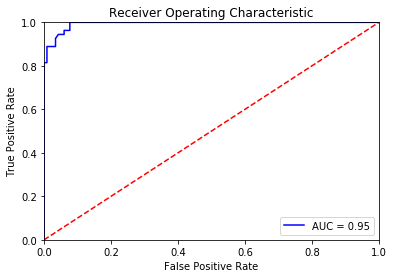

In [57]:
pkl.dump(best_rfc, open('D:\\Git\\cancer_classification\\Data\\RFCModel', 'wb'))
y_hat_rfc  = best_rfc.predict(X_test)
y_prob_rfc = best_rfc.predict_proba(X_test)
get_results(Y_test,y_hat_rfc,y_prob_rfc)

Checking feature importance

C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


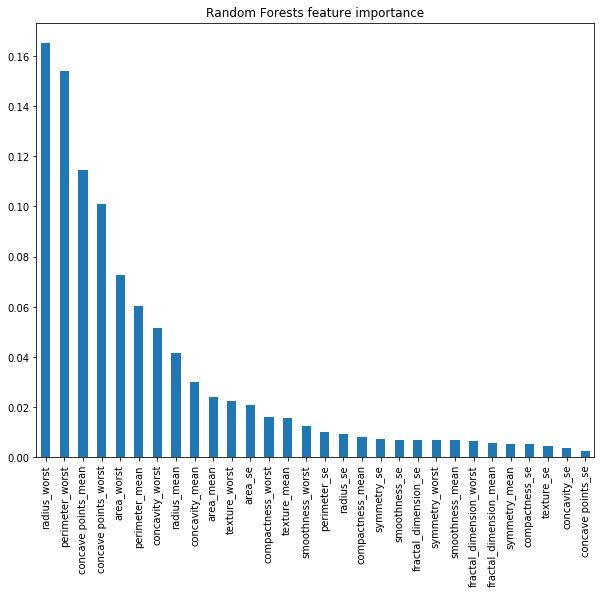

In [58]:
plt.figure(figsize = (10,8))
featimp = pd.Series(best_rfc.feature_importances_,index = X_train.columns).sort_values(ascending=False).plot('bar')
plt.title("Random Forests feature importance")
plt.show()

#### kNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knc = KNeighborsClassifier()
params = {
    'n_neighbors' : range(5, 25,2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_knc = GridSearchCV(estimator = knc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_knc.fit(X_train,Y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.1s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(5, 25, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [61]:
best_knc = grid_knc.best_estimator_
print(best_knc)
train_cv(X_train,Y_train,best_knc)

KNeighborsClassifier()
Cross-Validation Score : 92.500%
Cross-Validation Score : 97.500%
Cross-Validation Score : 97.500%
Cross-Validation Score : 96.203%
Cross-Validation Score : 94.937%
Mean Cross-Validation Score : 95.728%




Test set Results:


 Confusion Matrix : 
 [[111   6]
 [  1  53]]
Test Accuracy   Score :  0.9590643274853801
Precision :  0.8983050847457628
Recall : 0.9814814814814815
F1 Score: 0.9380530973451328
Area under curve :  0.965099715099715 



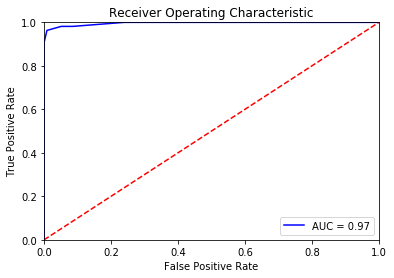

In [62]:
pkl.dump(best_knc, open('D:\\Git\\cancer_classification\\Data\\KNeighborClassifierModel', 'wb'))
y_hat_knc = best_knc.predict(X_test)
y_prob_knc = best_knc.predict_proba(X_test)
get_results(Y_test,y_hat_knc,y_prob_knc)